In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
print(type(range(200,300)))

<class 'range'>


In [2]:
def smr_eq(mass, temperature):
    '''This returns VO2 which is a proxy for SMR. 
        mass - the individuals mass in grams
        temperature - body temperture of the individual in celsius'''
    X1_mass=0.930
    X2_temp=0.044
    X3_const=-2.58
    log_smr = (X1_mass * np.log10(mass)) + (X2_temp * temperature) + X3_const
    smr = 10**log_smr
    return smr

def hourly_energy_expendeture(smr, activity_coeffcient):
    '''
    Our model for hourly energy expendature.
    Inputs:
        SMR - log(V02) which is in ml o^2 / hour
        Activity_coeffcient - multiplier to convert smr to amr. smr is the resting rate so a multiplier of 1 returns smr. A multiplier of >1 represents activity.
    Outputs:
        cals_burnt_per_hour - number of calories burnt by an individual.
    '''
    mlo2_to_joules = 19.874
    joules_to_cals = 2.39e-4
    hee = smr*activity_coeffcient
    joules_per_hour = hee*mlo2_to_joules
    cals_burnt_per_hour = joules_per_hour*joules_to_cals
    return cals_burnt_per_hour

def energy_intake(prey_mass, cal_per_gram_conversion, percent_digestion_cals):
    '''
    Amount of calories yielded from a prey agent.
    Inputs:
        prey_mass - mass of prey agent in grams
        cal_per_gram_conversion - conversion rate to get prey grams to calories
        percent_digestion_cals - percentage of calories lost to digestion.
    '''
    return float(prey_mass*cal_per_gram_conversion*percent_digestion_cals)

In [26]:
base_temps = [10, 15, 20, 25, 30, 35, 40] 
time = range(0,8760)
body_sizes = [60, 62, 64, 66, 68, 70]
initial_energy_foraging = 200
initial_energy_resting = 200

# Lists to store data for each combination of base_temp, body_size, and time

data = []



for temp in base_temps:

    for size in body_sizes:

        # Reset initial energy levels for each scenario

        resting_energy = initial_energy_resting

        foraging_energy = initial_energy_foraging

        

        # Temporary lists for storing calorie expenditure for each time step

        cals_spent_resting = []

        cals_spent_foraging = []

        # Loop over time

        for t in time:

            # Calculate SMR based on current mass and temperature (passing individual values)

            smr = smr_eq(mass=size, temperature=temp)
            # Calculate energy expenditure for resting and foraging

            resting_energy_expendeture = hourly_energy_expendeture(smr=smr, activity_coeffcient=1)

            foraging_energy_expendeture = hourly_energy_expendeture(smr=smr, activity_coeffcient=2)

            # Update energy levels
            resting_energy -= resting_energy_expendeture
            foraging_energy -= foraging_energy_expendeture
            # Store results
            cals_spent_resting.append(resting_energy)
            cals_spent_foraging.append(foraging_energy)
        # Append data for each combination of temp and body size

        data.extend([

            {"Base_Temp": temp, "Body_Size": size, "Time": t, "Cals_Spent_Resting": cals_spent_resting[t], "Cals_Spent_Foraging": cals_spent_foraging[t]}

            for t in time

        ])



# Convert collected data into a DataFrame

df_grid = pd.DataFrame(data)




In [6]:
df_grid.head()

,Base_Temp,Body_Size,Time,Cals_Spent_Resting,Cals_Spent_Foraging
0,10,60,0,499.998450,499.997675
1,10,60,1,499.996900,499.995350
2,10,60,2,499.995350,499.993024
3,10,60,3,499.993800,499.990699
4,10,60,4,499.992249,499.988374


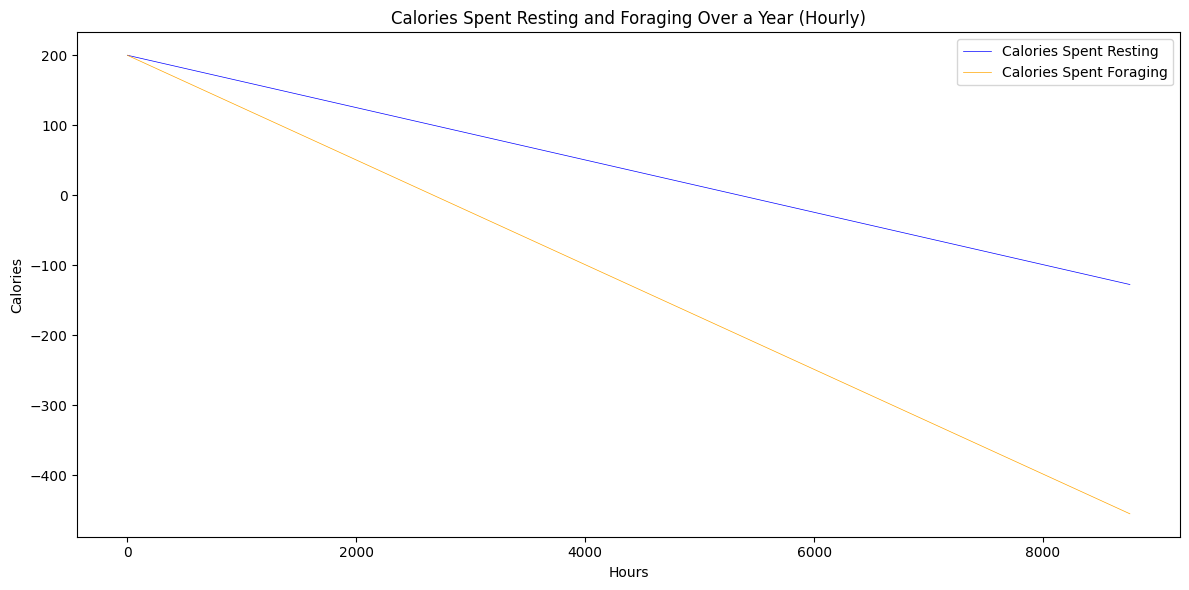

In [27]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time, cals_spent_resting, label="Calories Spent Resting", color='blue', linewidth=0.5)
plt.plot(time, cals_spent_foraging, label="Calories Spent Foraging", color='orange', linewidth=0.5)

# Labels and Title
plt.title("Calories Spent Resting and Foraging Over a Year (Hourly)")
plt.xlabel("Hours")
plt.ylabel("Calories")
plt.legend()
plt.tight_layout()
plt.show()

/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

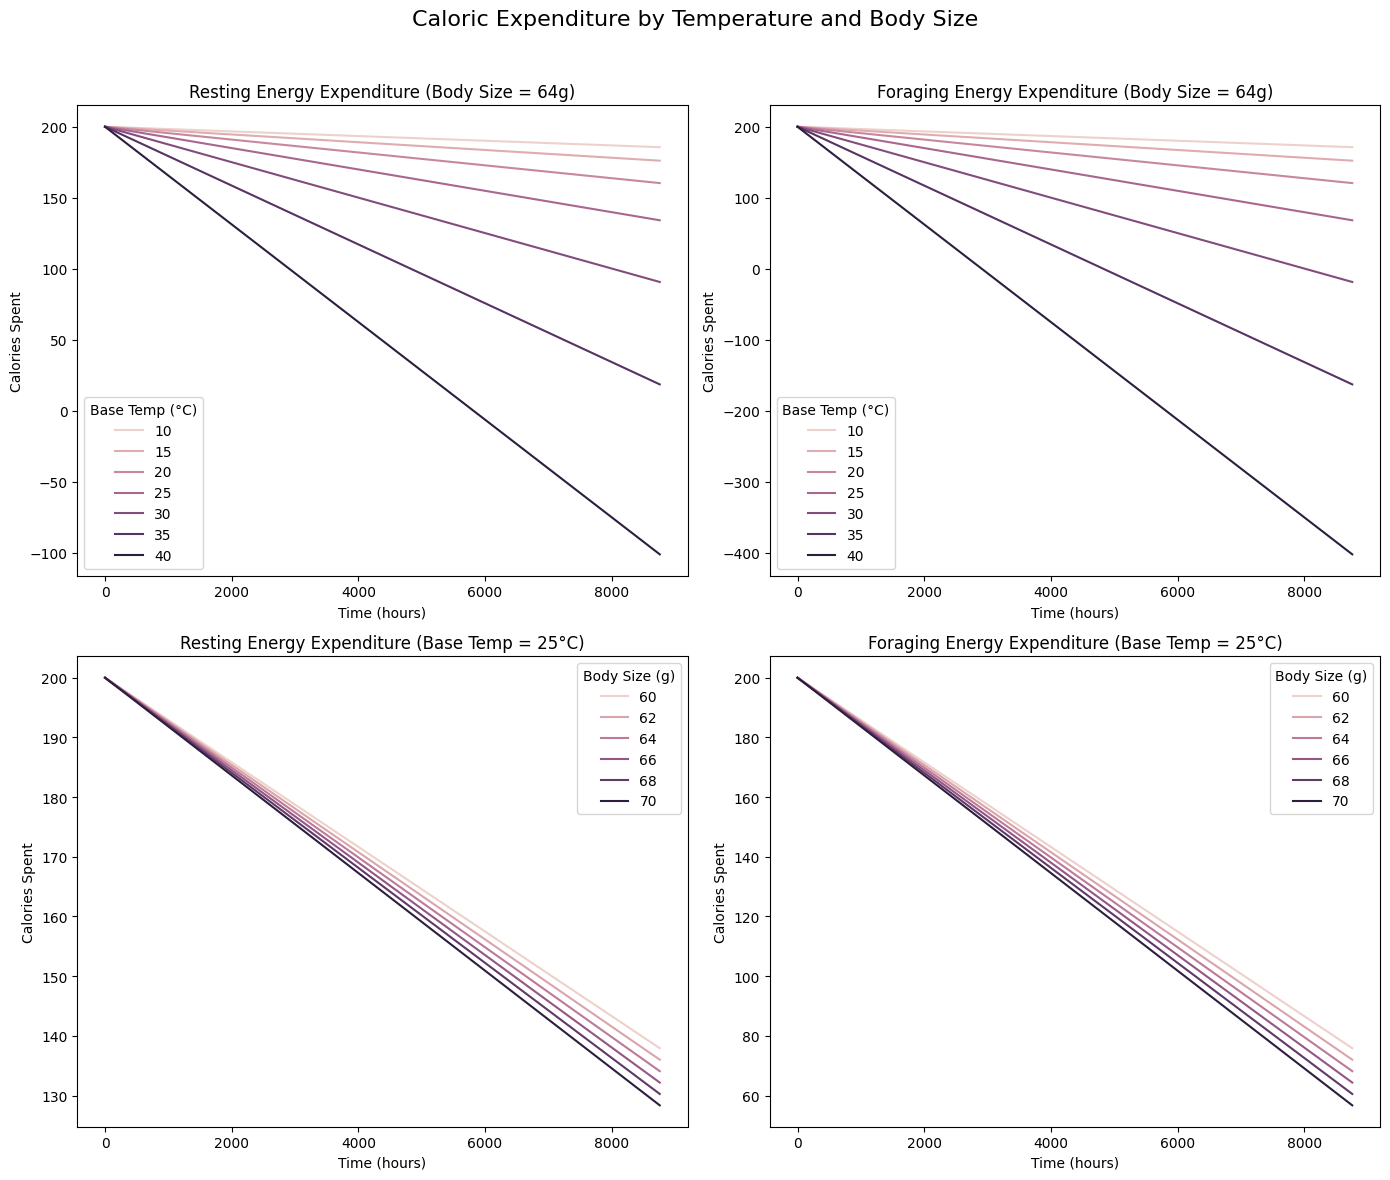

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



# Set up the figure and axes for a 2x2 grid

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

fig.suptitle("Caloric Expenditure by Temperature and Body Size", fontsize=16)



# Top row: varying base temperature, fixed body size

# Filtering data for a single body size (e.g., 60) to focus on base temperature variation

body_size_fixed = 64

df_temp_variation = df_grid[df_grid['Body_Size'] == body_size_fixed]



# Plot resting energy expenditure by base temperature (Top-Left)

sns.lineplot(data=df_temp_variation,
             x="Time",
             y="Cals_Spent_Resting",
             hue="Base_Temp", 
             ax=axs[0, 0])

axs[0, 0].set_title(f"Resting Energy Expenditure (Body Size = {body_size_fixed}g)")

axs[0, 0].set_xlabel("Time (hours)")

axs[0, 0].set_ylabel("Calories Spent")

axs[0, 0].legend(title="Base Temp (°C)")



# Plot foraging energy expenditure by base temperature (Top-Right)

sns.lineplot(data=df_temp_variation, x="Time", y="Cals_Spent_Foraging", hue="Base_Temp", ax=axs[0, 1])

axs[0, 1].set_title(f"Foraging Energy Expenditure (Body Size = {body_size_fixed}g)")

axs[0, 1].set_xlabel("Time (hours)")

axs[0, 1].set_ylabel("Calories Spent")

axs[0, 1].legend(title="Base Temp (°C)")



# Bottom row: varying body size, fixed base temperature

# Filtering data for a single base temperature (e.g., 25) to focus on body size variation

base_temp_fixed = 25

df_size_variation = df_grid[df_grid['Base_Temp'] == base_temp_fixed]



# Plot resting energy expenditure by body size (Bottom-Left)

sns.lineplot(data=df_size_variation, x="Time", y="Cals_Spent_Resting", hue="Body_Size", ax=axs[1, 0])

axs[1, 0].set_title(f"Resting Energy Expenditure (Base Temp = {base_temp_fixed}°C)")

axs[1, 0].set_xlabel("Time (hours)")

axs[1, 0].set_ylabel("Calories Spent")

axs[1, 0].legend(title="Body Size (g)")



# Plot foraging energy expenditure by body size (Bottom-Right)

sns.lineplot(data=df_size_variation, x="Time", y="Cals_Spent_Foraging", hue="Body_Size", ax=axs[1, 1])

axs[1, 1].set_title(f"Foraging Energy Expenditure (Base Temp = {base_temp_fixed}°C)")

axs[1, 1].set_xlabel("Time (hours)")

axs[1, 1].set_ylabel("Calories Spent")

axs[1, 1].legend(title="Body Size (g)")



# Adjust layout

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

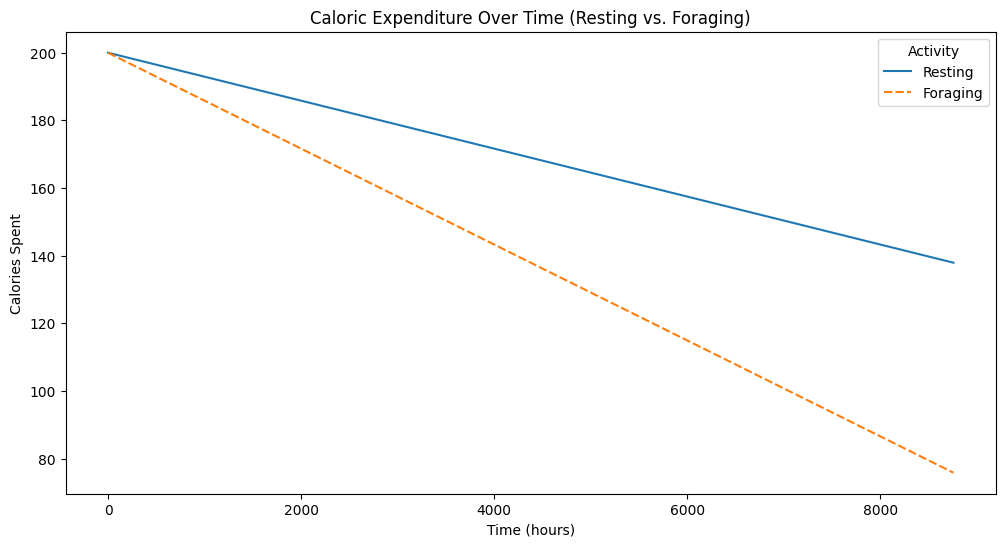

In [29]:
body_size_fixed = 60

base_temp_fixed = 25



# Filter for fixed conditions and create separate DataFrames for resting and foraging

df_combined_filtered = df_grid[(df_grid['Body_Size'] == body_size_fixed) & (df_grid['Base_Temp'] == base_temp_fixed)]



# Prepare unique DataFrames for each activity

df_combined_resting = df_combined_filtered[['Time', 'Cals_Spent_Resting']].copy()

df_combined_resting = df_combined_resting.rename(columns={'Cals_Spent_Resting': 'Calories_Spent'})

df_combined_resting['Activity'] = 'Resting'



df_combined_foraging = df_combined_filtered[['Time', 'Cals_Spent_Foraging']].copy()

df_combined_foraging = df_combined_foraging.rename(columns={'Cals_Spent_Foraging': 'Calories_Spent'})

df_combined_foraging['Activity'] = 'Foraging'



# Combine resting and foraging data

df_combined_plot = pd.concat([df_combined_resting, df_combined_foraging], ignore_index=True)



# Plotting with unique Time-Activity entries

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_combined_plot, x="Time", y="Calories_Spent", hue="Activity", style="Activity", dashes=True)



# Labels and title

plt.title("Caloric Expenditure Over Time (Resting vs. Foraging)")

plt.xlabel("Time (hours)")

plt.ylabel("Calories Spent")

plt.legend(title="Activity")

plt.show()

/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mremington/anaconda3/envs/therma_sim/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

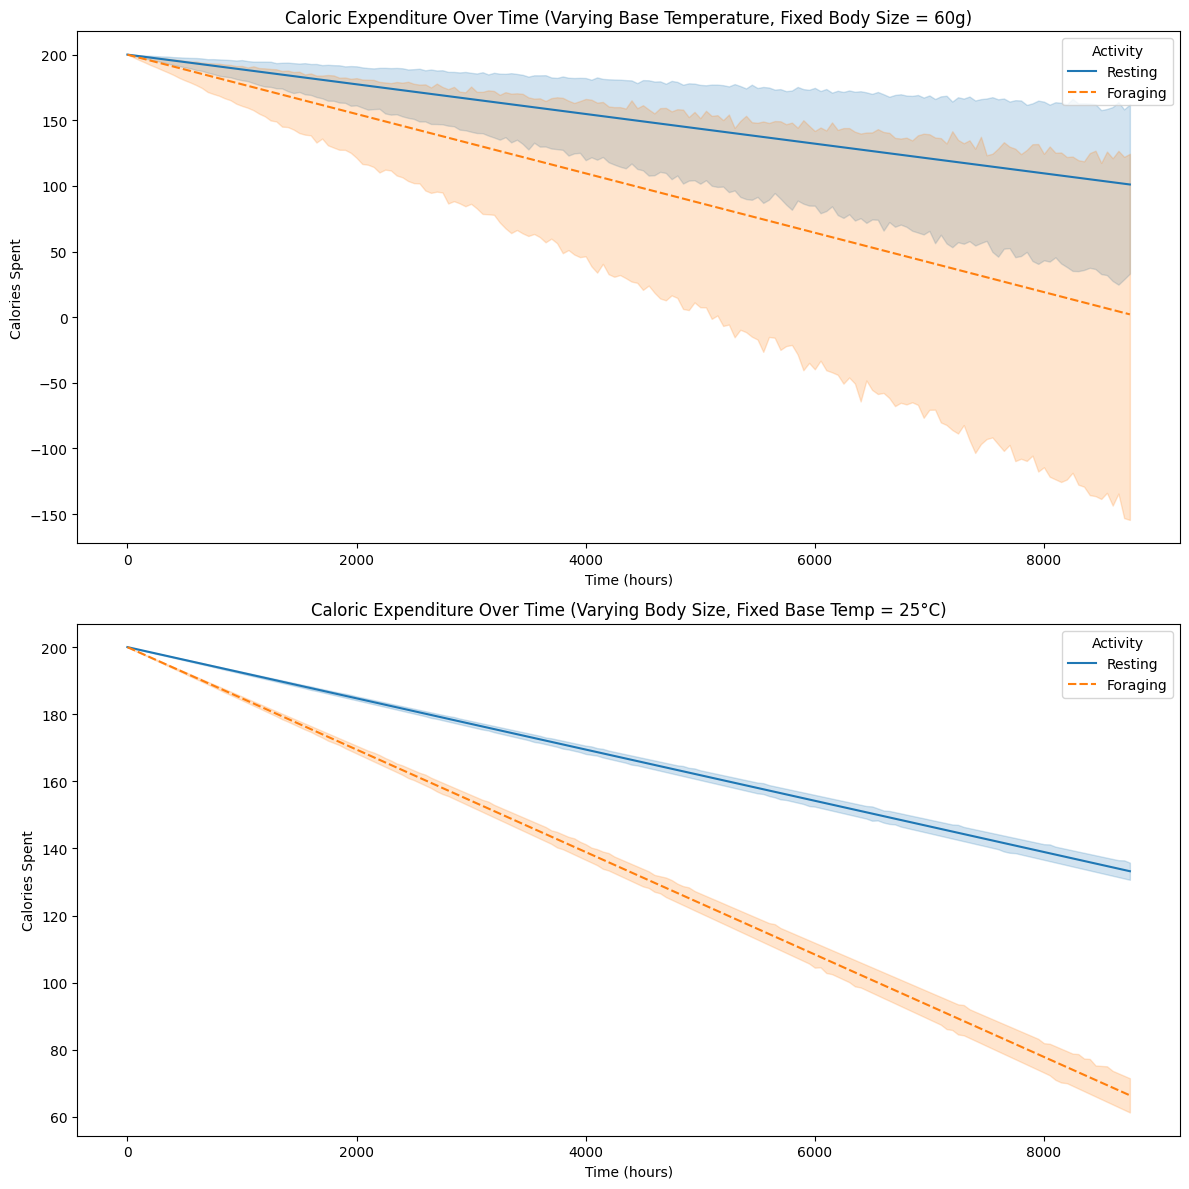

In [30]:
# Constants for fixed body size and base temperature
body_size_fixed = 60
base_temp_fixed = 25

# Separate DataFrames with `Activity` and `Calories_Spent` columns
# Varying temperature with fixed body size
df_temp_variation_resting = df_grid[df_grid['Body_Size'] == body_size_fixed][['Time', 'Base_Temp', 'Cals_Spent_Resting']].copy()
df_temp_variation_resting = df_temp_variation_resting.rename(columns={'Cals_Spent_Resting': 'Calories_Spent'})
df_temp_variation_resting['Activity'] = 'Resting'

df_temp_variation_foraging = df_grid[df_grid['Body_Size'] == body_size_fixed][['Time', 'Base_Temp', 'Cals_Spent_Foraging']].copy()
df_temp_variation_foraging = df_temp_variation_foraging.rename(columns={'Cals_Spent_Foraging': 'Calories_Spent'})
df_temp_variation_foraging['Activity'] = 'Foraging'

df_temp_variation_combined = pd.concat([df_temp_variation_resting, df_temp_variation_foraging], ignore_index=True)

# Varying body size with fixed temperature
df_size_variation_resting = df_grid[df_grid['Base_Temp'] == base_temp_fixed][['Time', 'Body_Size', 'Cals_Spent_Resting']].copy()
df_size_variation_resting = df_size_variation_resting.rename(columns={'Cals_Spent_Resting': 'Calories_Spent'})
df_size_variation_resting['Activity'] = 'Resting'

df_size_variation_foraging = df_grid[df_grid['Base_Temp'] == base_temp_fixed][['Time', 'Body_Size', 'Cals_Spent_Foraging']].copy()
df_size_variation_foraging = df_size_variation_foraging.rename(columns={'Cals_Spent_Foraging': 'Calories_Spent'})
df_size_variation_foraging['Activity'] = 'Foraging'

df_size_variation_combined = pd.concat([df_size_variation_resting, df_size_variation_foraging], ignore_index=True)

# Sampling for efficient plotting
sample_interval = 50
df_temp_variation_sampled = df_temp_variation_combined[df_temp_variation_combined['Time'] % sample_interval == 0]
df_size_variation_sampled = df_size_variation_combined[df_size_variation_combined['Time'] % sample_interval == 0]

# Plotting the 2x1 grid with sampled data
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot for varying base temperature with fixed body size
sns.lineplot(data=df_temp_variation_sampled, x="Time", y="Calories_Spent", hue="Activity", style="Activity", dashes=True, ax=axs[0])
axs[0].set_title(f"Caloric Expenditure Over Time (Varying Base Temperature, Fixed Body Size = {body_size_fixed}g)")
axs[0].set_xlabel("Time (hours)")
axs[0].set_ylabel("Calories Spent")

# Plot for varying body size with fixed base temperature
sns.lineplot(data=df_size_variation_sampled, x="Time", y="Calories_Spent", hue="Activity", style="Activity", dashes=True, ax=axs[1])
axs[1].set_title(f"Caloric Expenditure Over Time (Varying Body Size, Fixed Base Temp = {base_temp_fixed}°C)")
axs[1].set_xlabel("Time (hours)")
axs[1].set_ylabel("Calories Spent")

# Adjust layout
plt.tight_layout()
plt.show()
